<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">

<h1 align=left><font size = 8"><b>Inteligência Artificial</b></font></h1>
<h1 align=left><font size = 6"><b>Aprendizado Não Supervisionado e Detecção de Anomalia</b></font></h2>

# Atividade: T4 - Atividade de aprofundamento

Nome: Bruno Rebocho de Toledo

Turma: 01B

Matrícula: 92316328

In [1]:
#!pip install pandas-ods-reader

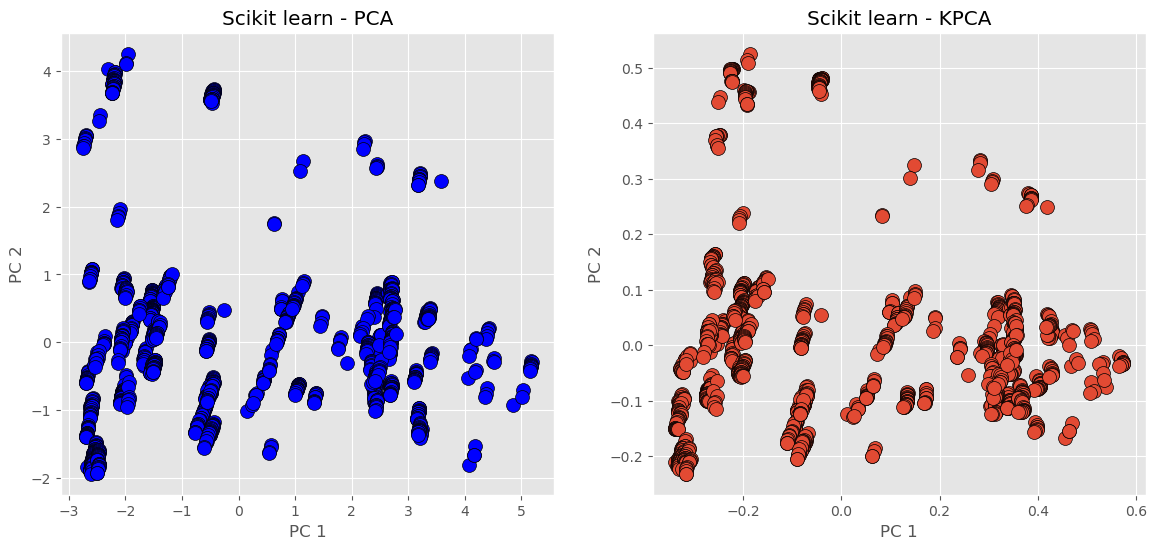

In [2]:
from pandas_ods_reader import read_ods
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import pandas as pd

df = read_ods('data/Composicao_RMs_RIDEs_AglomUrbanas_2020_06_30.ods')
df.drop(columns=['DATA'], axis=1, inplace=True)

# Transformando os dados categóricos em numéricos
le = LabelEncoder()
for col in ['GRANDE_REG', 'SIGLA_UF', 'NOME', 'TIPO', 'CAT_ASSOC', 'NOME_MUN', 'LEG']:
    df[col] = le.fit_transform(df[col])

# Removendo uma única linha que não seguia o padrão da coluna
df.drop(df[df['COD_CAT_ASSOC'] == '350101 a 350105'].index, inplace=True)

# Pré-processamento e redimensionamento
X_std = StandardScaler().fit_transform(df.values)

# PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# Kernel PCA
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.01)
X_kpca = kpca.fit_transform(X_std)

# Plotting
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    ax[0].scatter(X_pca[:,0], X_pca[:,1], s=100, facecolor='b', edgecolors='k')
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[0].set_title('Scikit learn - PCA')

    ax[1].scatter(X_kpca[:,0], X_kpca[:,1], s=100, edgecolors='k')   
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[1].set_title('Scikit learn - KPCA')
    plt.show()


## Análise de dados do PCA

In [3]:
import numpy as np

print('Variância por componente principal: {}'.format(pca.explained_variance_ratio_))

Variância por componente principal: [0.44205209 0.15787922 0.1060335 ]


## Análise de dados do K-PCA

In [4]:
explained_variance = np.var(X_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

#Variancia por componente
print('Variância por componente principal: {}'.format(explained_variance_ratio))

Variância por componente principal: [0.6283512  0.22392671 0.14772209]


## Conclusão

Através da análise da variância por componente principal, podemos observar que a aplicação da técnica não-linear K-PCA capturou uma proporção maior de variância nos três primeiros grupos, visto que o primeiro obteve um resultado de 62,83% contra 44,20% do PCA, em seguida 22,39% contra 15,78% no segundo e, por fim, 14,77% contra 10,6% no terceiro.